In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
14020,16.1900,1025.5,63.856,3.1972,18.875,1054.8,549.87,109.20,10.540,3.6947,75.209
14021,15.8350,1025.5,63.397,3.7645,23.057,1080.4,550.16,128.14,11.693,2.3615,75.847
14022,14.6840,1025.5,68.801,4.1049,25.665,1096.5,550.04,140.91,12.295,1.0665,80.408
14023,13.5020,1025.6,72.476,3.8622,24.095,1087.4,550.30,134.40,11.949,1.2706,76.284


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14025 entries, 0 to 14024
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      14025 non-null  float64
 1   AP      14025 non-null  float64
 2   AH      14025 non-null  float64
 3   AFDP    14025 non-null  float64
 4   GTEP    14025 non-null  float64
 5   TIT     14025 non-null  float64
 6   TAT     14025 non-null  float64
 7   TEY     14025 non-null  float64
 8   CDP     14024 non-null  float64
 9   CO      14024 non-null  float64
 10  NOX     14024 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [4]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [5]:
model_data = df[['AP', 'NOX','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,AP,NOX,TIT,TAT,AFDP,CO,AT,TEY
0,1007.9,82.722,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,1008.4,82.776,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,1008.8,82.468,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,1009.2,82.670,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,1009.7,82.311,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [6]:
X = model_data.iloc[:,0:7]
y = model_data.iloc[:,7]

In [7]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [8]:
X_standardized

array([[-0.80004476,  1.51145145, -1.5247711 , ..., -0.91319242,
         0.57119435, -1.50315501],
       [-0.71865469,  1.5168099 , -1.51865274, ..., -0.9134516 ,
         0.60921661, -1.51298546],
       [-0.65354263,  1.48624691, -1.51253438, ..., -0.93600015,
         0.59286145, -1.49809444],
       ...,
       [ 2.06488587,  1.28183214,  0.75737765, ..., -0.12930642,
        -0.4018213 , -0.46929286],
       [ 2.08116389,  0.87260567,  0.20060678, ..., -0.44381978,
        -0.30671906, -0.62547018],
       [ 2.04860786,         nan,  0.17613333, ..., -0.43617401,
                nan, -0.79829584]])

In [9]:
X_standardized.shape

(14025, 7)

In [10]:
y.shape

(14025,)

In [11]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2

In [12]:
from keras.optimizers import SGD

In [13]:
# create model
model = Sequential()
model.add(Dense(units=12, input_dim=7,  activation='relu')) #1st layer
model.add(Dense(7, input_dim=12, activation='relu')) #2nd layer
model.add(Dense(1, activation='linear')) #3rd layer or op layer

In [1]:
 # output layer of neural network contain
    # for regression model(continuous data) , output layer may contain linear function, 
# sigmoid for binary classification 
# softmax for multi classification 

In [14]:
# Compile model
opt=SGD(lr=0.01,momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

D:\python\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [2]:
# optimizer for regression model will be mean squaresd error or mse logarithmic etc
# binary crossentropy for binary classification

In [15]:
# Fit the model
history = model.fit(X_standardized,y, validation_split=0.30, epochs=100, batch_size=50)

Epoch 1/100
197/197 [==============================] - 1s 3ms/step - loss: 1.0063 - mse: 2695.9084 - val_loss: nan - val_mse: nan
Epoch 2/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0167 - mse: 335.9171 - val_loss: nan - val_mse: nan
Epoch 3/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0108 - mse: 217.6916 - val_loss: nan - val_mse: nan
Epoch 4/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0084 - mse: 166.7179 - val_loss: nan - val_mse: nan
Epoch 5/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0070 - mse: 138.6660 - val_loss: nan - val_mse: nan
Epoch 6/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0061 - mse: 119.7793 - val_loss: nan - val_mse: nan
Epoch 7/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 105.4406 - val_loss: nan - val_mse: nan
Epoch 8/100
197/197 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 94.2770

In [18]:
# evaluate the model
scores = model.evaluate(X_standardized, y)
scores

439/439 [==============================] - 0s 1ms/step - loss: nan - mse: nan      


[nan, nan]

In [19]:
# Visualize training history

# list all data in history
history.history.keys()



dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

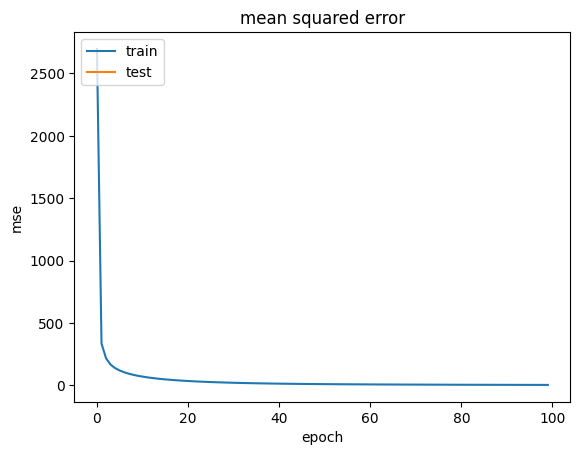

In [20]:
# summarize history for mse
import matplotlib.pyplot as plt
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mean squared error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
